# Continuous Control
**Michael Santoro - michael.santoro@du.edu**
# Introduction

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ppo_agent import Agent
from unityagents import UnityEnvironment

seed = 42

# Single Agent

In [2]:
env = UnityEnvironment(file_name="reacher_v1\Reacher.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## Learning Algorithim

## View the Trained Agent Play

## Plot of Rewards

# Multi Agent

## Learning Algorithim

## Plot of Rewards

# Ideas for Future Work

In [3]:
max_ep_len = 300

update_timestep = 15    # update policy every n timesteps
K_epochs = 40               # update policy for K epochs
eps_clip = 0.2              # clip parameter for PPO
gamma = 0.99                # discount factor

lr_actor = 0.0003       # learning rate for actor network
lr_critic = 0.001       # learning rate for critic network

random_seed = 0         # set random seed if required (0 = no random seed)

action_std_decay_freq = 60
action_std_decay_rate = 1e-3
min_action_std = 1e-3

In [4]:
# initialize a PPO agent
agent = Agent(33, 4, 42)

Things I have Tried
- Reduced Dimensions of the Network

setting actor output action_std to :  0.299
Episode 1	Average Score: 0.00	Average Losses: 0.01
setting actor output action_std to :  0.298
Episode 2	Average Score: 0.00	Average Losses: -0.01
setting actor output action_std to :  0.297
Episode 3	Average Score: 0.00	Average Losses: 0.02
setting actor output action_std to :  0.296
Episode 4	Average Score: 0.01	Average Losses: 0.01
setting actor output action_std to :  0.295
Episode 5	Average Score: 0.01	Average Losses: 0.03
setting actor output action_std to :  0.294
Episode 6	Average Score: 0.01	Average Losses: -0.01
setting actor output action_std to :  0.293
Episode 7	Average Score: 0.02	Average Losses: -0.01
setting actor output action_std to :  0.292
Episode 8	Average Score: 0.03	Average Losses: -0.02
setting actor output action_std to :  0.291
Episode 9	Average Score: 0.02	Average Losses: -0.01
setting actor output action_std to :  0.29
Episode 10	Average Score: 0.02	Average Losses: 0.01
setting actor output action_std to :  0.289
E

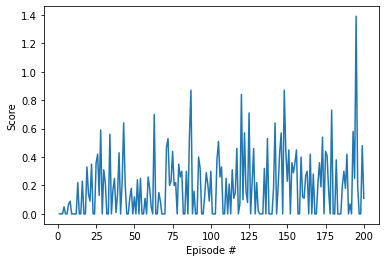

In [5]:
def ppo(n_episodes=200, max_t=max_ep_len, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    losses = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(1,max_t+1):
            action = agent.select_action(state)
            action = action.astype(np.int32)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished

            # saving reward and is_terminals
            agent.buffer.rewards.append(reward)
            agent.buffer.is_terminals.append(done)

            # update PPO agent
            if t % update_timestep == 0:
                loss = agent.update()
                losses.append(loss)

            score += reward
            if done:
                break
            
        # decay action std of ouput action distribution
        agent.decay_action_std(action_std_decay_rate, min_action_std)
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tAverage Losses: {:.2f}\n'.format(i_episode, np.mean(scores_deque),np.array(losses[-10:]).mean()), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tAverage Losses: {:.2f}\n'.format(i_episode, np.mean(scores_deque), np.mean(scores_deque),np.array(losses[-10:]).mean()))
    
    agent.save(f'ppo_checkpoint\checkpoint_ppo.pth')        
    return scores,losses

scores, losses = ppo()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

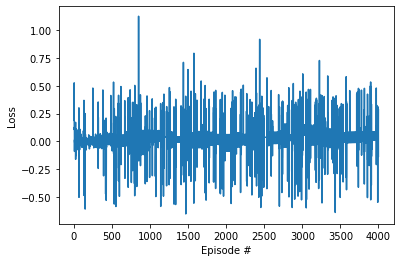

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(losses)+1), losses)
plt.ylabel('Loss')
plt.xlabel('Episode #')
plt.show()

In [7]:
env.close()
